# Introducción a Python - UC3M - Ejercicio 1


In [54]:
import matplotlib as plt
import numpy as np

## 1 Fibonacci
### 1.1a. Cálculo de la serie de Fibonacci con numpy

In [55]:
k1=3 #Termino k-esimo a calcular
A=np.array([[1,1],[1,0]])
k=k1-1
F=[1,0]

In [56]:
for i in np.arange(k):
    if i==0:
        Ak=A
    else:
        Ak=np.dot(A,Ak)
v=np.dot(Ak,F)
print('Término ', k1, '-ésimo: ',v[0])

Término  3 -ésimo:  2


In [57]:
Ak=A
for i in np.arange(1,k):
    Ak=np.dot(A,Ak)
v=np.dot(Ak,F)
print('Término ', k1, '-ésimo: ',v[0])

Término  3 -ésimo:  2


### 1.1b. Cálculo utilizando numpy.linalg

In [62]:
from numpy.linalg import matrix_power
Ak=matrix_power(A,k)
v=np.dot(Ak,F)
print('Término ', k1, '-ésimo: ',v[0])

Término  3 -ésimo:  2


### 1.2 Diagonalización de la matriz A


In [63]:
from numpy.linalg import eig
from numpy.linalg import inv
from numpy.linalg import multi_dot

In [64]:
A=np.array([[1,1],[1,0]])
autovalores=eig(A)[0]
D=np.eye(2,2)*autovalores
D

array([[ 1.61803399, -0.        ],
       [ 0.        , -0.61803399]])

In [65]:
P=eig(A)[1]
P

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

In [66]:
Pinv=inv(P)

In [67]:
multi_dot([P,D,Pinv])

array([[ 1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -1.21244049e-16]])

### 1.3 Ak como cálculo directo

In [69]:
def funAk(k):
    A=np.array([[1,1],[1,0]])
    autovalores=eig(A)[0]
    D=np.eye(2,2)*autovalores
    P=eig(A)[1]
    Pinv=inv(P)
    Dk=D**k
    Ak=multi_dot([P,Dk,Pinv])
    return Ak

In [70]:
for i in range(1,15):
    Ak=funAk(i)
    F=np.array([1,0])
    v=np.dot(Ak,F)
    print('Término ', i+1, '-ésimo: ',v[0])

Término  2 -ésimo:  1.0
Término  3 -ésimo:  2.0
Término  4 -ésimo:  3.0
Término  5 -ésimo:  5.0
Término  6 -ésimo:  8.000000000000002
Término  7 -ésimo:  13.000000000000004
Término  8 -ésimo:  21.000000000000004
Término  9 -ésimo:  34.000000000000014
Término  10 -ésimo:  55.00000000000003
Término  11 -ésimo:  89.00000000000003
Término  12 -ésimo:  144.00000000000003
Término  13 -ésimo:  233.0000000000001
Término  14 -ésimo:  377.00000000000017
Término  15 -ésimo:  610.0000000000002


In [71]:
k1=14 #Termino k-esimo a clacular
k=k1-1
Ak=funAk(k)
F=np.array([1,0])
v=np.dot(Ak,F)
print('Término ', k1, '-ésimo: ',v[0])

Término  14 -ésimo:  377.00000000000017


## 2. Polinomios de Bernstein
### 2.1 Dibujar polinomios

In [72]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np


In [73]:
x=np.arange(0,1,0.1)

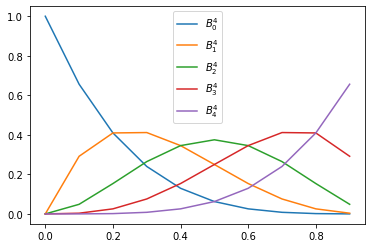

In [74]:
y0=np.array(list(map(lambda x:(1-x)**4,x)))
y1=np.array(list(map(lambda x:4*x*(1-x)**3,x)))
y2=np.array(list(map(lambda x:6*x**2*(1-x)**2,x)))
y3=np.array(list(map(lambda x:4*x**3*(1-x),x)))
y4=np.array(list(map(lambda x:x**4,x)))

yy=[y0,y1,y2,y3,y4]



for i in range(5):
    plt.plot(x,yy[i], label='$B^4_'+str(i)+'$')
plt.legend(loc='upper center')


### 2.2 Matriz PSB
Base Bernstein [ $B^4_0$, $B^4_1$, $B^4_2$, $B^4_3$, $B^4_4$ ] 

In [75]:
b0=[1,-4,6,-4,1]
b1=[0,4,-12,12,-4]
b2=[0,0,6,-12,6]
b3=[0,0,0,4,-4]
b4=[0,0,0,0,1]


In [76]:
def funPol(coef):
    '''
    Función para representar los polinomios como fórmula
    Input: Lista con 5 coeficientes
    '''
    import functools 
    x=['','x','x^2','x^3','x^4']
    polList=list(map(lambda a,x:str(a)+x if a<0 else '+'+str(a)+x ,coef,x))
    pol=functools.reduce(lambda a,b:a+b,polList)
    return pol

In [81]:
print(b0, 'corresponde a ',funPol(b0))
print(b1, 'corresponde a ',funPol(b1))
print(b2, 'corresponde a ',funPol(b2))
print(b3, 'corresponde a ',funPol(b3))
print(b4, 'corresponde a ',funPol(b4))

[1, -4, 6, -4, 1] corresponde a  +1-4x+6x^2-4x^3+1x^4
[0, 4, -12, 12, -4] corresponde a  +0+4x-12x^2+12x^3-4x^4
[0, 0, 6, -12, 6] corresponde a  +0+0x+6x^2-12x^3+6x^4
[0, 0, 0, 4, -4] corresponde a  +0+0x+0x^2+4x^3-4x^4
[0, 0, 0, 0, 1] corresponde a  +0+0x+0x^2+0x^3+1x^4


In [93]:

PSB=np.array([b0,b1,b2,b3,b4])
PSB=np.transpose(PSB)
print('La matriz PSB es: ')
print(PSB)

La matriz PSB es: 
[[  1   0   0   0   0]
 [ -4   4   0   0   0]
 [  6 -12   6   0   0]
 [ -4  12 -12   4   0]
 [  1  -4   6  -4   1]]


### 2.3 Cambio de base del polinomio


In [79]:
PS=[4,-12,6,-8,3]

print('Cambio de base del polinomio:')
print(funPol(PS))
PS=np.array(PS)
QBS=np.linalg.inv(PSB)
PB=np.dot(QBS,PS)
print('a base de Bernstein [B40,B41,B42,B43,B44]:')
print(PB)

Cambio de base del polinomio:
+4-12x+6x^2-8x^3+3x^4
a base de Bernstein:[B40,B41,B42,B43,B44]
[ 4.  1. -1. -4. -7.]
